In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns

import random
def Seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
Seed_everything(0)

In [2]:
cs = sns.color_palette()


In [3]:
tmp = pd.read_csv('results.csv')

In [4]:
tmp.shape,tmp['pdb'].nunique()

((475, 61), 42)

In [5]:
for c in ['AF3 ranking_score','AF3 iptm','AF3 ptm','AF2 ranking_score']:
    tmp[c] = (tmp[f'{c}_wt']-tmp[c]).fillna(0)
for c in ['AF3 mean_pae','AF2 mean_pae']:
    tmp[c] = (tmp[c]-tmp[f'{c}_wt']).fillna(0)

In [6]:
methods = [
 'AF3 ranking_score','AF3 iptm','AF3 ptm','AF3 mean_pae',
 'AF2 ranking_score','AF2 mean_pae',
 'BeAtMuSiC',
 'BindProfX',
 'DSMBind',
 'ELASPIC',
 'ESM1v',
 'ESM2',
 'Effective Strain',
 'EvoEF',
 'FlexddG',
 'FoldX',
 'MutaBind',
 'ProGen2',
 'SAAMBE',
 'SSIPe',
 'mCSM',
 'ProteinMPNN']

In [7]:
for c in methods:
    if 'AF3' not in c:
        tmp[f'AF3 ranking_score + {c}'] = tmp['AF3 ranking_score'].rank() + tmp[c].rank()

    if c != 'SSIPe ddg':
        tmp[f'SSIPe + {c}'] = tmp['SSIPe'].rank() + tmp[c].rank()
        

In [8]:
all_m = {}
for c in tmp.columns:
    if c not in methods and '+' not in c:
        continue
    if tmp[c].isna().sum() > 0:
        print(c)
        continue
    all_m[c] = [tmp['ddg'].corr(tmp[c]),tmp['ddg'].rank().corr(tmp[c].rank()),roc_auc_score((tmp['ddg']>0)+0,tmp[c])]

BeAtMuSiC
ELASPIC
mCSM
MutaBind
SAAMBE
AF3 ranking_score + BeAtMuSiC
SSIPe + BeAtMuSiC
AF3 ranking_score + ELASPIC
SSIPe + ELASPIC
AF3 ranking_score + MutaBind
SSIPe + MutaBind
AF3 ranking_score + SAAMBE
SSIPe + SAAMBE
AF3 ranking_score + mCSM
SSIPe + mCSM


In [9]:
mdf = pd.DataFrame(all_m.values(),columns=['Pearson','Spearman','AUC'])

In [10]:
mdf.insert(0,'method',all_m.keys())

In [11]:
mdf.sort_values(by='Pearson',ascending=False)

,method,Pearson,Spearman,AUC
17,SSIPe + AF3 ranking_score,0.745432,0.707875,0.828943
43,AF3 ranking_score + SSIPe,0.745432,0.707875,0.828943
18,SSIPe + AF3 iptm,0.728525,0.700646,0.827606
28,SSIPe + DSMBind,0.702214,0.650865,0.781288
38,SSIPe + FlexddG,0.699453,0.670751,0.815066
39,AF3 ranking_score + FoldX,0.695347,0.672948,0.809549
35,AF3 ranking_score + EvoEF,0.694616,0.657155,0.801236
26,SSIPe + BindProfX,0.689280,0.646254,0.779490
37,AF3 ranking_score + FlexddG,0.686167,0.667237,0.817141
4,SSIPe,0.681519,0.622461,0.776832


In [12]:
single_mdf = mdf.loc[mdf['method'].apply(lambda x:'+' not in x)].sort_values(by='Pearson',ascending=False)
print(single_mdf.to_latex(index=False,
                  float_format="{:.2f}".format))

\begin{tabular}{lrrr}
\toprule
           method &  Pearson &  Spearman &  AUC \\
\midrule
            SSIPe &     0.68 &      0.62 & 0.78 \\
          DSMBind &     0.62 &      0.53 & 0.73 \\
          FlexddG &     0.62 &      0.58 & 0.77 \\
        BindProfX &     0.56 &      0.58 & 0.74 \\
            EvoEF &     0.55 &      0.51 & 0.72 \\
      ProteinMPNN &     0.51 &      0.45 & 0.65 \\
AF3 ranking\_score &     0.49 &      0.51 & 0.71 \\
            FoldX &     0.49 &      0.54 & 0.74 \\
         AF3 iptm &     0.49 &      0.50 & 0.72 \\
          AF3 ptm &     0.36 &      0.33 & 0.63 \\
     AF3 mean\_pae &     0.32 &      0.37 & 0.64 \\
             ESM2 &     0.27 &      0.35 & 0.68 \\
AF2 ranking\_score &     0.21 &      0.23 & 0.57 \\
 Effective Strain &     0.18 &      0.31 & 0.61 \\
     AF2 mean\_pae &     0.05 &      0.22 & 0.54 \\
            ESM1v &    -0.02 &      0.06 & 0.52 \\
          ProGen2 &    -0.09 &      0.01 & 0.47 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4009101/1157291169.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(single_mdf.to_latex(index=False,


In [13]:
method_map_dic = {'1Force Field and Profile-based':['SSIPe','FoldX','FlexddG','EvoEF','BindProfX'],
                  '2Structure-based Deep Learning':['DSMBind','ProteinMPNN'],
                  '3AlphaFold':['AF3 ranking_score','AF3 iptm','AF3 ptm','AF3 mean_pae','AF2 ranking_score','AF2 mean_pae','Effective Strain'],
                  '4Protein Language-based':['ESM2','ESM1v','ProGen2'],}

In [14]:
single_mdf.insert(0,'Category',single_mdf['method'].apply(lambda x:[g for g in method_map_dic if x in method_map_dic[g]][0]))

In [15]:
single_mdf = single_mdf.sort_values(by=['Category','Pearson'],ascending=[True,False]).reset_index(drop=True)
single_mdf['Category'] = single_mdf['Category'].apply(lambda x:x[1:])

In [16]:
print(single_mdf.to_latex(index=False,
                  float_format="{:.2f}".format))

\begin{tabular}{llrrr}
\toprule
                     Category &            method &  Pearson &  Spearman &  AUC \\
\midrule
Force Field and Profile-based &             SSIPe &     0.68 &      0.62 & 0.78 \\
Force Field and Profile-based &           FlexddG &     0.62 &      0.58 & 0.77 \\
Force Field and Profile-based &         BindProfX &     0.56 &      0.58 & 0.74 \\
Force Field and Profile-based &             EvoEF &     0.55 &      0.51 & 0.72 \\
Force Field and Profile-based &             FoldX &     0.49 &      0.54 & 0.74 \\
Structure-based Deep Learning &           DSMBind &     0.62 &      0.53 & 0.73 \\
Structure-based Deep Learning &       ProteinMPNN &     0.51 &      0.45 & 0.65 \\
                    AlphaFold & AF3 ranking\_score &     0.49 &      0.51 & 0.71 \\
                    AlphaFold &          AF3 iptm &     0.49 &      0.50 & 0.72 \\
                    AlphaFold &           AF3 ptm &     0.36 &      0.33 & 0.63 \\
                    AlphaFold &      AF3 mean

/tmp/ipykernel_4009101/2856006774.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(single_mdf.to_latex(index=False,


In [17]:
import scipy

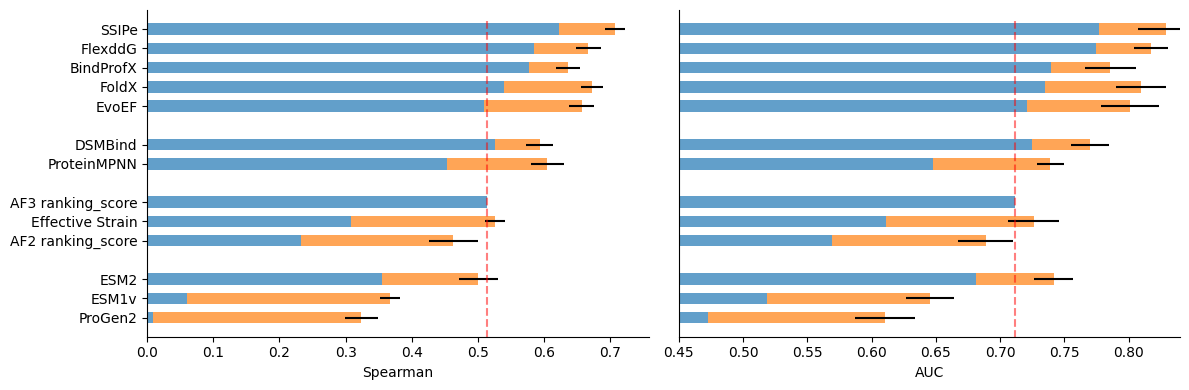

In [18]:
plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)

order = ['SSIPe',
 'FlexddG',
 'BindProfX',
 'FoldX',
 'EvoEF',
 'DSMBind',
 'ProteinMPNN',
 'AF3 ranking_score',
 'Effective Strain',
 'AF2 ranking_score',
 'ESM2',
 'ESM1v',
 'ProGen2']

order_pos = [0,1,2,3,4,6,7,9,10,11,13,14,15]
focus_method = 'AF3 ranking_score'
metric = 'Spearman'
submdf = mdf.loc[mdf['method'].isin(order)].set_index('method')
submdf = submdf.loc[order].reset_index()
all_methods = []
ens = []
sample_ens = []
for m in submdf['method'].values:
#     if m != focus_method:
    if 'AF3' not in m:
        for i in range(10):
            tmp1 = tmp.sample(tmp.shape[0],replace=True).reset_index(drop=True)
            sample_ens.append((tmp1[focus_method].rank() + tmp1[m].rank()).corr(tmp1['ddg'].rank())-mdf.loc[mdf['method']==m][metric].values[0])
            all_methods.append(m)
        ens.append(mdf.loc[mdf['method']==f'{focus_method} + {m}'][metric].values[0]-mdf.loc[mdf['method']==m][metric].values[0])
    else:
        ens.append(0)
        sample_ens.append(0)
        all_methods.append(focus_method)
sample_df = pd.DataFrame({'method':all_methods,'ens':sample_ens})
xerr = []
for m in submdf['method'].values:
#     if m != focus_method:
    if 'AF3' not in m:
        x = sample_df.loc[sample_df['method']==m,'ens'].values
        xerr.append(scipy.stats.t.interval(0.95, len(x), np.mean(x), scipy.stats.sem(x))[1]-np.mean(x))
    else:
        xerr.append(0)
# sns.barplot(y=submdf['method'].values,x=submdf[metric].values,order=order,color=cs[0],alpha=0.75, orient='h',gap=0.4,width=1)
# sns.barplot(y=submdf['method'].values,x=ens,color=cs[1],alpha=0.75,gap=0.4,width=1,order=order,errorbar=None,xerr=xerr,left=[max(0,x) for x in submdf[metric].values], orient='h')
sns.barplot(y=[0],x=[0], orient='h')
plt.barh(order_pos, submdf[metric].values,color=cs[0],alpha=0.7,height=0.6)
plt.barh(order_pos,ens,color=cs[1],alpha=0.7,height=0.6,xerr=xerr,left=[max(0,x) for x in submdf[metric].values])

plt.vlines(mdf.loc[mdf['method']==f'{focus_method}',metric].values[0],-0.45,16,alpha=0.5,color='red',linestyles='dashed')
plt.xlabel(metric)
plt.ylabel('')
plt.yticks(order_pos,order)

plt.ylim(16,-1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(1,2,2)
metric = 'AUC'
all_methods = []
ens = []
sample_ens = []

for m in submdf['method'].values:
#     if m != focus_method:
    if 'AF3' not in m:
        for i in range(10):
            tmp1 = tmp.sample(tmp.shape[0],replace=True).reset_index(drop=True)
            sample_ens.append(roc_auc_score(tmp1['ddg']>0+0,tmp1[focus_method].rank() + tmp1[m].rank())-mdf.loc[mdf['method']==m][metric].values[0])
            all_methods.append(m)
        
        ens.append(mdf.loc[mdf['method']==f'{focus_method} + {m}'][metric].values[0]-mdf.loc[mdf['method']==m][metric].values[0])
    else:
        ens.append(0)
        sample_ens.append(0)
        all_methods.append(focus_method)
sample_df = pd.DataFrame({'method':all_methods,'ens':sample_ens})
xerr = []
for m in submdf['method'].values:
#     if m != focus_method:
    v = mdf.loc[mdf['method']==m][metric].values[0]
    if 'AF3' not in m:
        x = sample_df.loc[sample_df['method']==m,'ens'].values
        err = scipy.stats.t.interval(0.95, len(x), np.mean(x), scipy.stats.sem(x))[1]-np.mean(x)
        xerr.append(err)
    else:
        xerr.append(0)
# sns.barplot(y=order_pos,x=submdf[metric].values,color=cs[0],alpha=0.75, orient='h',gap=0.4,width=1)
# sns.barplot(y=order_pos,x=ens,color=cs[1],alpha=0.75,gap=0.4,width=1,errorbar=None,xerr=xerr,left=[max(0,x) for x in submdf[metric].values], orient='h')
sns.barplot(y=[0],x=[0], orient='h',width=1)
plt.barh(order_pos, submdf[metric].values,color=cs[0],alpha=0.7,height=0.6)
plt.barh(order_pos,ens,color=cs[1],alpha=0.7,height=0.6,xerr=xerr,left=[max(0,x) for x in submdf[metric].values])

plt.vlines(mdf.loc[mdf['method']==f'{focus_method}',metric].values[0],-0.45,16,alpha=0.5,color='red',linestyles='dashed')
plt.xlabel(metric)
plt.ylabel('')
plt.yticks([])
plt.ylim(16,-1)
plt.xlim(0.45,0.84)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('fig1_af3_with_others_order.png',dpi=300)

In [19]:
corr_dic = {}
for c in mdf['method'].values:
    if '+' not in c and 'AF3' not in c:
        print(c,tmp['AF3 ranking_score'].corr(tmp[c]))
        corr_dic[c] = tmp['AF3 ranking_score'].corr(tmp[c])

SSIPe 0.26233416678340965
BindProfX 0.3195361831428498
EvoEF 0.18420510441644616
FlexddG 0.3729801945753529
FoldX 0.18250798949913294
DSMBind 0.43705791714759207
ProteinMPNN 0.20511960258317627
ProGen2 0.15033413038499677
ESM2 0.2883205349919238
ESM1v 0.07176617319803065
Effective Strain 0.02655197186621807
AF2 ranking_score 0.24007632175591023
AF2 mean_pae -0.01042717992395852


In [20]:
corr_df = pd.DataFrame({'method':corr_dic.keys(),'corr':corr_dic.values()})
corr_df = corr_df.sort_values(by='corr',ascending=False)

In [21]:
corr_mat = tmp[['AF3 ranking_score']+corr_df['method'].tolist()].corr()

In [22]:
from matplotlib.colors import TwoSlopeNorm


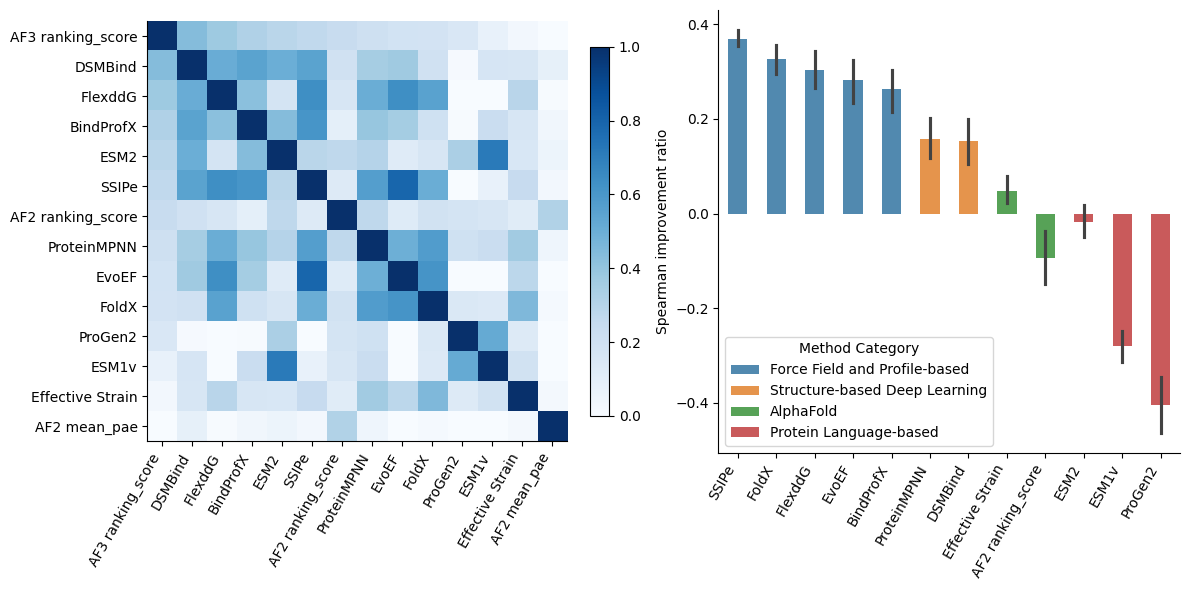

In [23]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1,2,1)
norm = TwoSlopeNorm(vmin=0., vcenter=0.5, vmax=1)
plt.imshow(corr_mat, norm=norm, cmap="Blues")
plt.xticks(np.arange(len(corr_mat)),['AF3 ranking_score']+corr_df['method'].tolist(),rotation=60,ha='right')
plt.yticks(np.arange(len(corr_mat)),['AF3 ranking_score']+corr_df['method'].tolist())
plt.colorbar(fraction=0.04)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(1,2,2)

focus_method = 'AF3 ranking_score'
metric = 'Spearman'

submdf = mdf.loc[mdf['method'].apply(lambda x:'+' not in x and 'AF3' not in x)].sort_values(by=metric,ascending=False)

a = mdf.loc[mdf['method']==focus_method,metric].values[0]

all_method = []
all_ratio = []
order = ['SSIPe',
 'FoldX',
 'FlexddG',
 'EvoEF',
 'BindProfX',
 'ProteinMPNN',
 'DSMBind',
 'Effective Strain',
 'AF2 ranking_score',
 'ESM2',
 'ESM1v',
 'ProGen2']
for m in order:
#     if m != focus_method:
    if 'AF3' not in m:
        for _ in range(10):
            tmp1 = tmp.sample(tmp.shape[0],replace=True).reset_index(drop=True)
            all_method.append(m)
            all_ratio.append(tmp1[f'{focus_method} + {m}'].rank().corr(tmp1['ddg'].rank())/a-1)
imp_df = pd.DataFrame({'method':all_method,'ratio':all_ratio})
imp_df['Category'] = imp_df['method'].map(dict(single_mdf.set_index('method')['Category']))

sns.barplot(imp_df,x='method',y='ratio',hue='Category',errorbar='ci',alpha=0.85,width=0.5,order=order)

# sns.barplot(x=x,y=y,color=cs[0],alpha=0.85,width=0.5,palette=[cs[0]]*5+[cs[1]]*2+[cs[2]]*2+[cs[3]]*3)
plt.xlabel('')
plt.ylabel(f'{metric} improvement ratio')
plt.xticks(rotation=60,ha='right')
plt.legend(title='Method Category',loc='lower left')
# 去除边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('fig2_af3_corr_and_improvement_ratio.png',dpi=300)